**Importing required Packages**

In [ ]:
import json
import zipfile
import os
import multiprocessing as mp
from multiprocessing import Pool
import shutil
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter
from math import log
import numpy as np
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Getting Important Stop words for English Language**

In [ ]:

stop_words = set(stopwords.words('english'))




**Importing Drive and files module from Google Colab to Upload, Extract and download files as per requirements**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files

**Function to read content from json files**

In [ ]:
def json2text(filepath):
    try:

        if not filepath.endswith('.json'):
            raise ValueError("Not a JSON file")

        with open(filepath, 'r', encoding='utf-8') as file:
            content = file.read().strip()
            if not content:
                raise ValueError("Empty file")
            paper_content = json.loads(content)
    except (UnicodeDecodeError, json.JSONDecodeError, ValueError) as e:
        print(f"Error reading {filepath}: {e}")
        return ""

    body_text = ""
    abstract = ""
    title = ""


    paper_id = paper_content.get('paper_id', '')

    if 'title' in paper_content:
        title = paper_content['title']

    if 'abstract' in paper_content:
        for abs in paper_content['abstract']:
            abstract += abs['text']

    if 'body_text' in paper_content:
        for bt in paper_content['body_text']:
            body_text += bt['text']

    return (f'{title} {abstract} {body_text}').lower()

**Function to write the contents extracted from a particular json file**

In [ ]:

def write_file(filename):
    file_path = os.path.join(correct_dir_path, filename)
    text_content = json2text(file_path)
    if text_content:
        output_dir = '/content/processed_texts'
        os.makedirs(output_dir, exist_ok=True)

        output_file_path = os.path.join(output_dir, f"{os.path.splitext(filename)[0]}.txt")

        with open(output_file_path, 'w', encoding='utf-8') as output_file:
            output_file.write(text_content)

        print(f"Processed and saved file: {output_file_path}")


**Function to write contents extracted from multiple json files in parallel with the help of multi-processing in a 1000 chunk size**

In [ ]:

def par_write(files):

    # here Parameters is files , which is list of files from a folder

    cpu_count =os.cpu_count()
    print(cpu_count)

    with Pool(processes=cpu_count) as p:
        p.map(write_file, files, chunksize=1000)

**Function to read file contents**

In [ ]:
def read_file_line_by_line(file_path):

    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                print(line.strip())
    except FileNotFoundError:
        print(f"The file at {file_path} was not found.")
    except Exception as e:
        print(f"An error occurred while reading the file: {e}")


**Unzipping the zipped files that are saved in google drive in the zip_file_path location**

In [ ]:
# Path to the zip file in your Google Drive
zip_file_path ='/content/drive/MyDrive/pdf_json.zip'


# Destination directory to extract files
extracted_dir_path = '/content/pdf_json'

# Create the directory if it doesn't exist
os.makedirs(extracted_dir_path, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir_path)

In [ ]:
# Correct directory path where JSON files are located
correct_dir_path = os.path.join(extracted_dir_path, 'pdf_json')

# List some of the extracted JSON files
extracted_files = os.listdir(correct_dir_path)

In [ ]:
# Process the JSON files in parallel
par_write(extracted_files)

Streaming output truncated to the last 5000 lines.
Processed and saved file: /content/processed_texts/33f114be9cf869ca6629766928aba6243740cefc.txt
Processed and saved file: /content/processed_texts/33a279a6eaa68106a41d03bdaebfbba10890a894.txtProcessed and saved file: /content/processed_texts/02ec0a61fb6dc6b7e9dd378541fc0fee804d5344.txt

Processed and saved file: /content/processed_texts/2c4fe1741f9e846f577876e4803c215e713a7615.txt
Processed and saved file: /content/processed_texts/3bc9fb6802659c626b1c84d3ab005226af362260.txtProcessed and saved file: /content/processed_texts/358d351a51c6f7f9ddb86ea3fb468c7fdc601e3d.txt
Processed and saved file: /content/processed_texts/6cbbd987f4a5041f20e515f75cee40cf2e51f808.txt

Processed and saved file: /content/processed_texts/3a8245f0d44a66cb43d2258a6a5284b8c1161d85.txt
Processed and saved file: /content/processed_texts/4aa644de45b19534571148ea7b81d35f080a4828.txtProcessed and saved file: /content/processed_texts/68a4cb26f4d7448117bfcb2d2794211c046

In [ ]:
# Define the path to the zip file in Google Drive
zip_file_path = '/content/drive/MyDrive/pdf_json.zip'

# Define the directory where the unzipped files will be saved
unzip_dir = '/content/processed_texts'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)

**Processing the files(where the json file contents are extracted and written) in parallel**

In [ ]:
# Define a function to preprocess a single text file
def preprocess_text_file(file_path, output_dir):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()

    # Step 1: Tokenization (split the text into words)
    tokens = text.split()

    # Step 2: Remove punctuation
    tokens = [re.sub(r'[^\w\s]', '', word) for word in tokens]

    # Step 3: Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]

    # Step 4: Remove numbers
    tokens = [re.sub(r'\d+', '', word) for word in tokens]

    # Rejoin tokens into a processed text string
    processed_text = ' '.join(tokens)

    # Save the processed text to a new file
    file_name = os.path.basename(file_path)
    output_file_path = os.path.join(output_dir, f"processed_{file_name}")
    with open(output_file_path, 'w', encoding='utf-8') as output_file:
        output_file.write(processed_text)

# Define the function for multiprocessing
def process_all_files(input_dir, output_dir, num_workers=8):
    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Get a list of all text files in the input directory
    all_files = [os.path.join(input_dir, file) for file in os.listdir(input_dir) if file.endswith('.txt')]

    # Use multiprocessing to process files in parallel
    with mp.Pool(processes=num_workers) as pool:
        pool.starmap(preprocess_text_file, [(file, output_dir) for file in all_files])

# Define paths
input_dir = '/content/processed_texts'
output_dir = '/content/processed_texts_output'
cpu_count =os.cpu_count() ##giving the number of cpu's in the system

process_all_files(input_dir, output_dir, num_workers=cpu_count) ##processing the files in parallel with the help of cpu's



In [ ]:
# Define the directory to be zipped and the output zip file path
directory_to_zip = '/content/processed_texts_output'
zip_file_path = '/content/processed_texts_output.zip'

# Compress the directory into a zip file
shutil.make_archive(zip_file_path.replace('.zip', ''), 'zip', directory_to_zip)

'/content/processed_texts_output.zip'

In [ ]:
#Download the zip file
files.download(zip_file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

processed_dir = '/content/processed_texts_output'

output_corpus_file = '/content/combined_text_corpus.txt'

def read_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

# Function to combine text files in parallel
def combine_files_in_parallel(processed_dir, num_workers=8):
    # Get the list of all text files in the directory
    all_files = [os.path.join(processed_dir, filename) for filename in os.listdir(processed_dir)]

    # Create a pool of workers
    with mp.Pool(processes=num_workers) as pool:
        # Use map to read files in parallel
        results = pool.map(read_file, all_files)

    # Combine all the results into one large string with newlines between files
    combined_corpus = "\n".join(results)
    return combined_corpus

# Use the function to combine files in parallel
combined_corpus = combine_files_in_parallel(processed_dir, num_workers=8)

# Save the combined corpus to the output file
with open(output_corpus_file, 'w', encoding='utf-8') as file:
    file.write(combined_corpus)



In [ ]:
files.download('/content/combined_text_corpus.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Estimating the value of alpha according to zipf's law

In [ ]:
# Define the directory containing the processed text files
processed_dir = '/content/processed_texts_output'

# Function to calculate term frequencies for a single file
def calculate_term_frequency(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()

    # Tokenization
    tokens = text.split()

    # Calculate term frequency for the file
    term_frequencies = Counter(tokens)
    return term_frequencies, len(tokens)  # Return term frequencies and total token count

# Function to process all files using multiprocessing and calculate IDF
def process_files_in_parallel(processed_dir, num_workers=8):
    all_files = [os.path.join(processed_dir, filename) for filename in os.listdir(processed_dir)]

    # Create a pool of workers
    with Pool(processes=num_workers) as pool:
        # Calculate term frequencies for all files in parallel
        results = pool.map(calculate_term_frequency, all_files)

    # Combine term frequencies from all files and count documents containing each term
    combined_term_frequencies = Counter()
    doc_count_per_term = Counter()
    total_documents = len(all_files)

    for term_frequencies, _ in results:
        combined_term_frequencies.update(term_frequencies)
        doc_count_per_term.update(term_frequencies.keys())

    return combined_term_frequencies, doc_count_per_term, total_documents


# Use the function to process files in parallel and calculate IDF
combined_term_frequencies, doc_count_per_term, total_documents = process_files_in_parallel(processed_dir, num_workers=8)

# Total number of words (for weighting if needed)
total_words = sum(combined_term_frequencies.values())

# Calculate IDF for each term
idf = {term: log(total_documents / (1 + doc_count_per_term[term])) for term in doc_count_per_term}

# Calculate TF-IDF for each term
tf_idf = {term: (freq / total_words) * idf[term] for term, freq in combined_term_frequencies.items()}

# Sort terms by TF-IDF value
sorted_terms = sorted(tf_idf.items(), key=lambda item: item[1], reverse=True)
ranks = np.arange(1, len(sorted_terms) + 1)
tf_idf_values = np.array([value for _, value in sorted_terms])

# Calculate the slope (α) of the log-log plot
slope, intercept = np.polyfit(np.log(ranks), np.log(tf_idf_values), 1)
alpha = -slope

print(f"Estimated value of α: {alpha:.4f}")



Estimated value of α: 1.1344


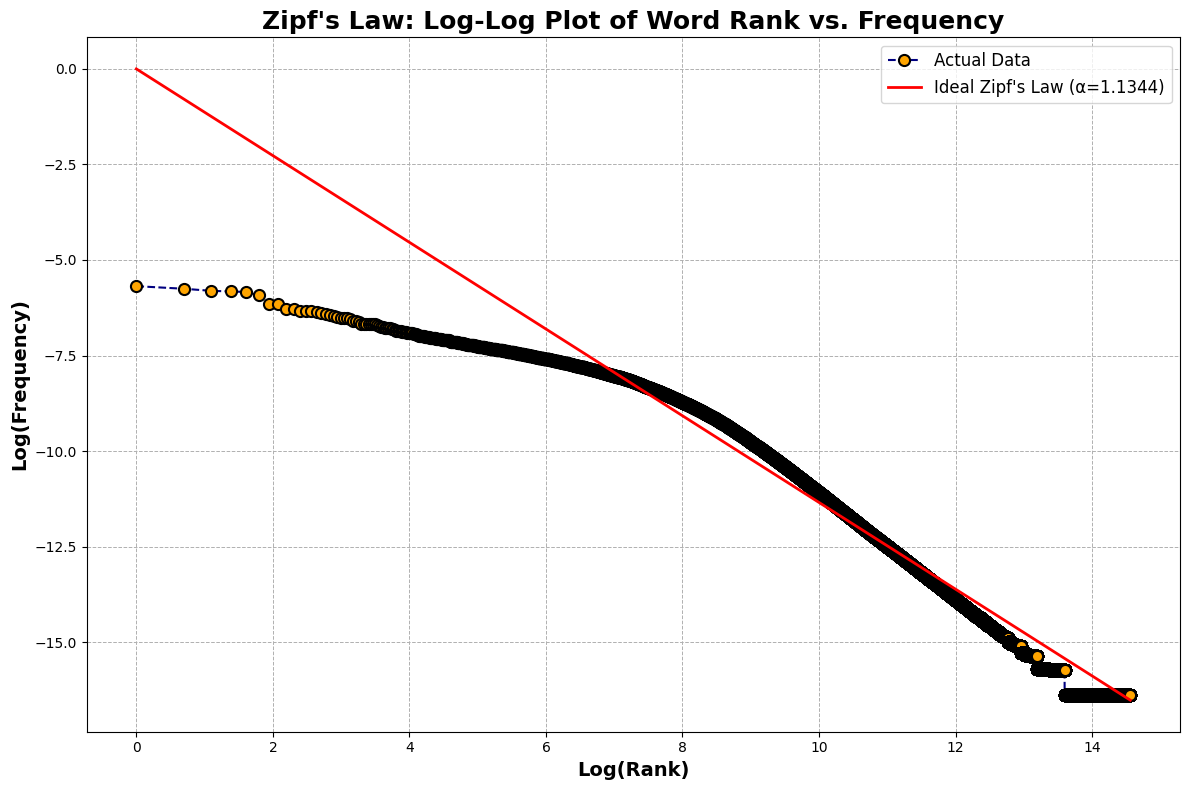

In [ ]:
plt.figure(figsize=(12, 8))

plt.plot(np.log(ranks), np.log(tf_idf_values), marker="o", linestyle="--", color='navy', markersize=8,
         markerfacecolor='orange', markeredgewidth=1.5, markeredgecolor='black', label='Actual Data')

ideal_frequencies = 1 / (ranks**1.1344)  # Assuming alpha = 1.1344
plt.plot(np.log(ranks), np.log(ideal_frequencies), linestyle="-", color='red', linewidth=2, label="Ideal Zipf's Law (α=1.1344)")

# Add titles and labels
plt.title("Zipf's Law: Log-Log Plot of Word Rank vs. Frequency", fontsize=18, weight='bold')
plt.xlabel("Log(Rank)", fontsize=14, weight='bold')
plt.ylabel("Log(Frequency)", fontsize=14, weight='bold')

plt.grid(True, linestyle='--', linewidth=0.7)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
print(f"Number of tokens: {total_words}")

vocab_size = len(combined_term_frequencies)
print(f"Vocabulary size: {vocab_size}")

print(f"Count per word on average: {total_words/vocab_size}")

Number of tokens: 134490712
Vocabulary size: 2105893
Count per word on average: 63.86398169327691


Checking how the number of vocbulary changes with the increasing number of token's and validation of Heap's law.

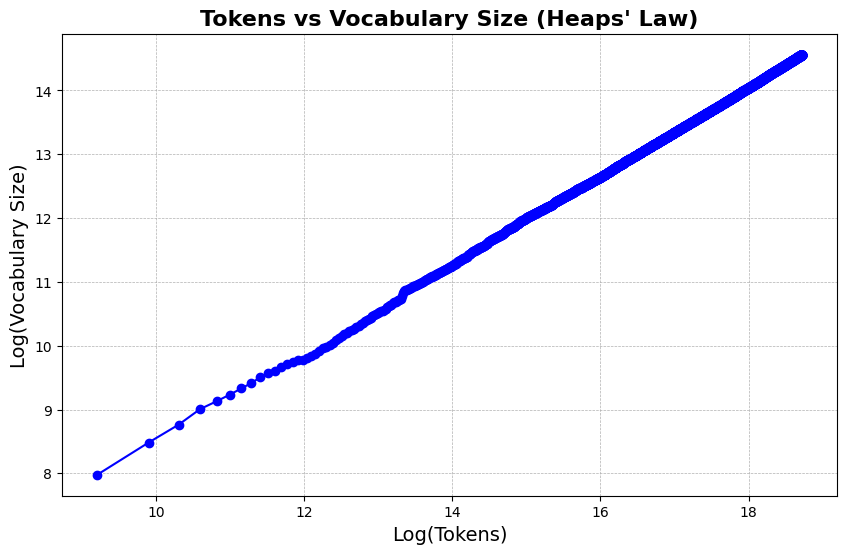

In [ ]:

def heaps_law(tokens, interval=10000):
    cumulative_tokens = 0
    cumulative_vocab = set()
    token_intervals = []
    vocab_sizes = []

    for token in tokens:
        cumulative_tokens += 1
        cumulative_vocab.add(token)

        if cumulative_tokens % interval == 0:
            token_intervals.append(cumulative_tokens)
            vocab_sizes.append(len(cumulative_vocab))

    return token_intervals, vocab_sizes

all_tokens = []
processed_dir = '/content/processed_texts_output'
for file_path in os.listdir(processed_dir):
    full_path = os.path.join(processed_dir, file_path)
    with open(full_path, 'r', encoding='utf-8') as file:
        text = file.read()
        tokens = text.split()
        all_tokens.extend(tokens)

token_intervals, vocab_sizes = heaps_law(all_tokens, interval=10000)

plt.figure(figsize=(10, 6))
plt.plot(np.log(token_intervals), np.log(vocab_sizes), marker='o', linestyle='-', color='blue')
plt.title("Tokens vs Vocabulary Size (Heaps' Law)", fontsize=16, weight='bold')
plt.xlabel("Log(Tokens)", fontsize=14)
plt.ylabel("Log(Vocabulary Size)", fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()